In [1]:

import pandas as pd
df = pd.read_excel('DATA .xlsx')
df



,Class,RSK_BB_ISSUER_DEFAULT,Ticker,Year,Quarter,1st Mon,2nd Mon,3rd Mon,Quarterly,Return on Common Equity,Return on Assets,Return on Invested Capital,Gross Margin,EBITDA Margin,Operating Margin,Incremental Operating Margin,Pre-Tax Income to Net Sales,Profit Margin,Revenue Growth Year over Year,EBITDA Growth Year over Year,EBIT Growth Year over Year,Net Income to Common Growth YoY,Diluted EPS Growth Adjusted YoY,Accounts Receivable 1 Yr Growth,Net Fixed Assets 1 Year Growth,Assets - 1 Year Growth,Modified Working Capital - 1 Yr Growth,Total Equity 1 Year Growth,Cash Flow - 1 Yr Growth,Capital - 1 Year Growth,Cash Ratio,Current Ratio,Quick Ratio,CFO to Average Current Liabilities,Common Equity to Tot Assets,Cashflow to Total Liabilities,Accounts Receivable Turnover,Days Sales Outstanding - DSO,Accounts Payable Turnover,Accounts Payable Turnover Days
0,0,IG1,ADBE,2007,1,Adobe Appoints Former Borland Exec to Senior V...,CIC Announces Electronic Signature Offering fo...,UPDATE 1-RESEARCH ALERT-Prudential raises Appl...,Adobe Appoints Former Borland Exec to Senior V...,10.6943,9.3045,8.6045,88.8725,33.0817,22.5339,-43.2713,26.8556,22.1511,-0.9262,-3.5520,-1.7635,36.9071,5.1846,8.2471,24.3756,1.7659,11.9703,0.6198,52.4851,0.6198,3.4818,4.3583,3.9467,2.5066,86.5162,193.1325,8.7645,41.5310,5.8515,62.2059
1,0,IG1,ADBE,2007,2,ADOBE ANNOUNCES NEW STOCK REPURCHASE PROGRAMAD...,Adobe to Acquire Hosted Services Innovator <AD...,Adobe Unveils LiveCycle Enterprise Suite <ADBE...,ADOBE ANNOUNCES NEW STOCK REPURCHASE PROGRAMAD...,11.5210,9.8646,9.2143,87.7660,35.8666,24.1948,28.3761,27.5110,20.4546,17.3294,-9.5061,20.9517,23.8901,23.0769,15.1499,26.7455,11.5326,16.0051,8.9566,-5.7523,8.9566,2.9828,3.7897,3.3911,2.2410,84.6766,161.2853,9.0164,40.3710,5.9813,60.8561
2,0,IG1,ADBE,2007,3,Adobe Ships Creative Suite 3 Production Premiu...,Investor Advisory: Adobe Announces Webcasts of...,Adobe Delivers Font Folio 11 <ADBE.O>Web sites...,Adobe Ships Creative Suite 3 Production Premiu...,14.1983,12.1348,11.7328,89.1250,39.6090,30.0087,58.3238,32.5231,24.0984,41.4312,3.2031,132.2082,117.4276,66.6667,-8.3043,30.9322,0.8126,-20.0775,-3.6798,-29.0506,-3.6798,2.4212,3.1015,2.7443,1.9662,83.5266,143.8063,10.7374,33.9001,6.5190,55.8366
3,0,IG1,ADBE,2007,4,Adobe Launches Flash Lite 3 <ADBE.O>ADOBE TO A...,"Software piracy rampant in Serbia, trade group...",Adobe Debuts Flash Media Server 3 Product Line...,Adobe Launches Flash Lite 3 <ADBE.O>ADOBE TO A...,14.7688,12.3980,12.6515,89.1797,38.8507,30.2709,49.3276,31.9001,24.3860,33.5744,39.4478,69.3738,21.2635,47.0387,-10.8375,27.5360,-4.1739,-16.7358,-9.7420,32.8172,-9.7420,2.3391,3.0185,2.7123,1.8840,81.3833,135.4759,9.3572,38.9004,6.5190,55.8366
4,0,IG1,ADBE,2008,1,TECHSHOW-Bill Gates says world on cusp of next...,"WebManiacs 2008, the Ultimate Conference for W...",US RESEARCH SUMMARY-S&P 500 March 5 1420 GMTAd...,TECHSHOW-Bill Gates says world on cusp of next...,17.9178,14.2166,15.0377,90.7378,38.8642,31.0925,54.1512,33.2018,24.6370,37.1166,61.0836,89.1948,52.5043,53.5761,-3.7677,14.9182,-9.5404,-10.3280,-25.3310,47.2780,-16.5214,2.5618,3.3250,2.9998,2.3685,71.4140,102.7825,11.3674,32.0215,6.7025,54.3078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,IG1,INTC,2015,4,INTEL CORP SHARES UP 1.1 PCT AT $30.47 IN PREM...,"Reuters Insider - Barron's Bounce: Pfizer, Mic...",Wind River Maintains Longstanding Position as ...,INTEL CORP SHARES UP 1.1 PCT AT $30.47 IN PREM...,19.3786,11.7149,14.1191,64.3020,43.2144,28.8253,-391.0112,28.8521,24.2256,1.3111,-2.7463,-3.4583,-1.3111,2.7470,8.1319,-4.1519,12.1491,32.5773,7.5876,-5.9608,18.9161,1.6157,2.5759,1.9212,1.2006,59.2684,45.3001,12.0154,30.2944,8.9670,40.5935
824,0,IG1,INTC,2016,1,Reuters Insider - How Congress May Help the Ma...,INTEL CORP <INTC.O> SHARES DOWN 2.5 PCT AT $30...,Intel Security Expands Partner Ecosystem <INTC...,Reuters Insider - Ho

In [2]:
df.isnull().sum()

Class                                     0
RSK_BB_ISSUER_DEFAULT                     0
Ticker                                    0
Year                                      0
Quarter                                   0
1st Mon                                   6
2nd Mon                                   9
3rd Mon                                   9
Quarterly                                 0
Return on Common Equity                   0
Return on Assets                          0
Return on Invested Capital                0
Gross Margin                              0
EBITDA Margin                             0
Operating Margin                          0
Incremental Operating Margin              0
Pre-Tax Income to Net Sales               0
Profit Margin                             0
Revenue Growth Year over Year             0
EBITDA Growth Year over Year              0
EBIT Growth Year over Year                0
Net Income to Common Growth YoY           0
Diluted EPS Growth Adjusted YoY 

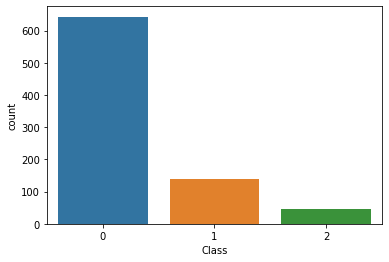

In [3]:
import seaborn as sns
sns.countplot(x='Class', data =df )

In [4]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Input, Flatten, Concatenate
import pandas as pd
from gensim import corpora
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
stop_words = set(stopwords.words('english'))
punctuation = ["'", ":", "b'", ".", "\"", "]", "[", ".'", ".\"", "?"]

stemmer = SnowballStemmer("english")
for p in punctuation:
    stop_words.add(p)
tokenizer = WordPunctTokenizer()

In [7]:
def custom_tokenize(text):
    tokens = tokenizer.tokenize(str(text))
    # filtered_tokens = [stemmer.stem(t.lower()) for t in tokens if not t in stop_words and len(t) > 1]
    filtered_tokens = [t.lower() for t in tokens if not t in stop_words and len(t) > 1]
    return " ".join(filtered_tokens)
    

In [8]:
print(custom_tokenize("let's go to mall!! Watch Jim's match"))

let go mall !! watch jim match


In [9]:
cols= df.columns
for col in cols:
    if "Quarterly" in col:
        df[str(col)+"_"]=df[col].apply(custom_tokenize)
        df.drop([col], axis=1, inplace=True)
  

In [ ]:
cols= df.columns
for col in cols:
    if "The 2nd Month" in col:
        df[str(col)+"_"]=df[col].apply(custom_tokenize)
        df.drop([col], axis=1, inplace=True)

In [ ]:
cols= df.columns
for col in cols:
    if "The 3rd Month" in col:
        df[str(col)+"_"]=df[col].apply(custom_tokenize)
        df.drop([col], axis=1, inplace=True)

In [10]:
df.head()


,Class,RSK_BB_ISSUER_DEFAULT,Ticker,Year,Quarter,1st Mon,2nd Mon,3rd Mon,Return on Common Equity,Return on Assets,Return on Invested Capital,Gross Margin,EBITDA Margin,Operating Margin,Incremental Operating Margin,Pre-Tax Income to Net Sales,Profit Margin,Revenue Growth Year over Year,EBITDA Growth Year over Year,EBIT Growth Year over Year,Net Income to Common Growth YoY,Diluted EPS Growth Adjusted YoY,Accounts Receivable 1 Yr Growth,Net Fixed Assets 1 Year Growth,Assets - 1 Year Growth,Modified Working Capital - 1 Yr Growth,Total Equity 1 Year Growth,Cash Flow - 1 Yr Growth,Capital - 1 Year Growth,Cash Ratio,Current Ratio,Quick Ratio,CFO to Average Current Liabilities,Common Equity to Tot Assets,Cashflow to Total Liabilities,Accounts Receivable Turnover,Days Sales Outstanding - DSO,Accounts Payable Turnover,Accounts Payable Turnover Days,Quarterly_
0,0,IG1,ADBE,2007,1,Adobe Appoints Former Borland Exec to Senior V...,CIC Announces Electronic Signature Offering fo...,UPDATE 1-RESEARCH ALERT-Prudential raises Appl...,10.6943,9.3045,8.6045,88.8725,33.0817,22.5339,-43.2713,26.8556,22.1511,-0.9262,-3.5520,-1.7635,36.9071,5.1846,8.2471,24.3756,1.7659,11.9703,0.6198,52.4851,0.6198,3.4818,4.3583,3.9467,2.5066,86.5162,193.1325,8.7645,41.5310,5.8515,62.2059,adobe appoints former borland exec senior vp w...
1,0,IG1,ADBE,2007,2,ADOBE ANNOUNCES NEW STOCK REPURCHASE PROGRAMAD...,Adobe to Acquire Hosted Services Innovator <AD...,Adobe Unveils LiveCycle Enterprise Suite <ADBE...,11.5210,9.8646,9.2143,87.7660,35.8666,24.1948,28.3761,27.5110,20.4546,17.3294,-9.5061,20.9517,23.8901,23.0769,15.1499,26.7455,11.5326,16.0051,8.9566,-5.7523,8.9566,2.9828,3.7897,3.3911,2.2410,84.6766,161.2853,9.0164,40.3710,5.9813,60.8561,adobe announces new stock repurchase programad...
2,0,IG1,ADBE,2007,3,Adobe Ships Creative Suite 3 Production Premiu...,Investor Advisory: Adobe Announces Webcasts of...,Adobe Delivers Font Folio 11 <ADBE.O>Web sites...,14.1983,12.1348,11.7328,89.1250,39.6090,30.0087,58.3238,32.5231,24.0984,41.4312,3.2031,132.2082,117.4276,66.6667,-8.3043,30.9322,0.8126,-20.0775,-3.6798,-29.0506,-3.6798,2.4212,3.1015,2.7443,1.9662,83.5266,143.8063,10.7374,33.9001,6.5190,55.8366,adobe ships creative suite production premium ...
3,0,IG1,ADBE,2007,4,Adobe Launches Flash Lite 3 <ADBE.O>ADOBE TO A...,"Software piracy rampant in Serbia, trade group...",Adobe Debuts Flash Media Server 3 Product Line...,14.7688,12.3980,12.6515,89.1797,38.8507,30.2709,49.3276,31.9001,24.3860,33.5744,39.4478,69.3738,21.2635,47.0387,-10.8375,27.5360,-4.1739,-16.7358,-9.7420,32.8172,-9.7420,2.3391,3.0185,2.7123,1.8840,81.3833,135.4759,9.3572,38.9004,6.5190,55.8366,adobe launches flash lite adbe adobe to acquir...
4,0,IG1,ADBE,2008,1,TECHSHOW-Bill Gates says world on cusp of next...,"WebManiacs 2008, the Ultimate Conference for W...",US RESEARCH SUMMARY-S&P 500 March 5 1420 GMTAd...,17.9178,14.2166,15.0377,90.7378,38.8642,31.0925,54.1512,33.2018,24.6370,37.1166,61.0836,89.1948,52.5043,53.5761,-3.7677,14.9182,-9.5404,-10.3280,-25.3310,47.2780,-16.5214,2.5618,3.3250,2.9998,2.3685,71.4140,102.7825,11.3674,32.0215,6.7025,54.3078,techshow bill gates says world cusp next digit...


In [65]:
from sklearn.utils import shuffle
df_random = shuffle(df)
df_random

,Class,RSK_BB_ISSUER_DEFAULT,Ticker,Year,Quarter,1st Mon,2nd Mon,3rd Mon,Return on Common Equity,Return on Assets,Return on Invested Capital,Gross Margin,EBITDA Margin,Operating Margin,Incremental Operating Margin,Pre-Tax Income to Net Sales,Profit Margin,Revenue Growth Year over Year,EBITDA Growth Year over Year,EBIT Growth Year over Year,Net Income to Common Growth YoY,Diluted EPS Growth Adjusted YoY,Accounts Receivable 1 Yr Growth,Net Fixed Assets 1 Year Growth,Assets - 1 Year Growth,Modified Working Capital - 1 Yr Growth,Total Equity 1 Year Growth,Cash Flow - 1 Yr Growth,Capital - 1 Year Growth,Cash Ratio,Current Ratio,Quick Ratio,CFO to Average Current Liabilities,Common Equity to Tot Assets,Cashflow to Total Liabilities,Accounts Receivable Turnover,Days Sales Outstanding - DSO,Accounts Payable Turnover,Accounts Payable Turnover Days,Quarterly_
811,0,IG1,INTC,2012,4,BMO CUTS MARVELL TECHNOLOGY GROUP <MRVL.O> PRI...,Intel Announces Intel SSD DC S3700 Series -- N...,Synacor partners with Zynga to bring social ga...,22.6641,14.1571,17.5672,58.0025,38.2875,23.4103,-352.1951,23.7738,18.3127,-2.9524,-16.6128,-31.3981,-26.5476,-26.0991,5.0137,18.4365,18.6054,15.7411,11.5266,-9.1101,21.4286,1.4081,2.4312,1.7053,1.5152,60.7023,56.9687,14.2566,25.5321,6.9671,52.2459,bmo cuts marvell technology group mrvl price t...
435,0,IG2,CTXS,2015,4,The National Investor Relations Institute -- S...,CITRIX SYSTEMS TO ANNOUNCE OPERATIONAL AND STR...,Citrix Cited as a Leader in Enterprise Mobilit...,15.4017,5.8100,10.9696,77.5905,27.1329,12.4238,9.5825,12.4005,14.5092,6.2573,4.8400,-4.2604,37.8523,74.9028,-0.7599,1.6417,-0.5546,-3.7443,-9.2103,47.9460,-4.8509,0.5184,1.0018,0.9165,0.6325,36.0023,29.4912,4.8756,74.8631,6.9862,52.2461,the national investor relations institute -- s...
740,0,IG4,AVGO,2015,1,Broadcom Introduces Industry's Most Power Effi...,BRIEF-Appaloosa Management dissolves share sta...,Broadcom Introduces Industry's First 5G WiFi C...,14.5015,6.7754,10.1466,50.5199,38.3486,24.5260,28.2937,21.4679,21.4679,130.6065,219.8980,188.4892,161.9403,111.7833,122.2910,85.5263,208.0933,117.6136,21.2567,110.0437,204.8764,3.0402,4.8497,3.8899,2.3606,33.9161,20.1867,9.9808,36.4701,8.5896,42.3770,broadcom introduces industry most power effici...
343,0,IG1,MSI,2012,4,Motorola Solutions Completes Acquisition of Ps...,Independent Testing Shows Motorola Solutions` ...,Motorola Solutions Redefines 2-way Radio Commu...,20.7808,6.6221,18.1678,50.3482,19.6641,17.3290,104.2553,16.6735,13.7649,6.1304,30.0813,53.2609,82.6087,63.9288,0.8039,-6.3616,-8.9741,-0.7055,-37.6185,9300.0000,-24.3208,1.0804,2.2192,1.6444,0.2987,25.7512,11.3750,4.6426,78.8343,6.2952,58.1393,motorola solutions completes acquisition psion...
264,0,IG1,CDNS,2013,1,Cadence Announces Fourth Quarter and Fiscal Y...,"MEDIA ALERT: Cadence to Present, Showcase Adv...",Cadence Palladium XP Verification System Wins...,65.8531,23.6737,42.7603,86.3969,22.5305,16.4103,33.2657,14.4098,22.1893,12.1698,18.6197,28.1940,152.7296,52.3195,-5.9302,-7.8714,29.4418,-7.7623,121.3063,24.0936,65.0749,0.7526,1.2076,0.8148,0.2976,43.8897,25.3623,17.5827,20.7021,1.7986,202.3789,cadence announces fourth quarter fiscal year 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,IG1,GLW,2014,4,Owens Corning to Announce Third-Quarter 2014 F...,Corning CEO Receives Highest Honor from Korea'...,SAMSUNG ELECTRONICS <005930.KS> SAYS TO SELL O...,11.7653,8.4454,5.1046,41.4309,34.6922,22.2962,78.5714,55.6156,41.0982,22.9039,92.6097,191.3043,128.9786,48.0200,19.7925,30.2520,5.5657,4.2237,2.0791,-13.3956,1.6773,2.6110,4.4053,3.2569,2.3140,64.1287,55.9862,7.0552,51.7349,6.4649,56.4584,owens corning announce third quarter 2014 fina...
163,0,IG2,JNPR,2007,4,Belgian National Research Network to Build Ser...,O'Neill Secures and Manages Expanding Retail B...,Dexia Banks on Juniper Networks Security Offer...,6.2923,5

In [97]:
df1=df_random.iloc[:,-1]
df1


811    bmo cuts marvell technology group mrvl price t...
435    the national investor relations institute -- s...
740    broadcom introduces industry most power effici...
343    motorola solutions completes acquisition psion...
264    cadence announces fourth quarter fiscal year 2...
                             ...                        
709    owens corning announce third quarter 2014 fina...
163    belgian national research network build servic...
44     analog devices completes sale cpu voltage pc t...
256    cadence announces fourth quarter fiscal year 2...
621    intracoastal bank enhances digital services fi...
Name: Quarterly_, Length: 828, dtype: object

In [98]:
max_length = max([len(d.split(" ")) for d in df["Quarterly_"]])
max_length

4699

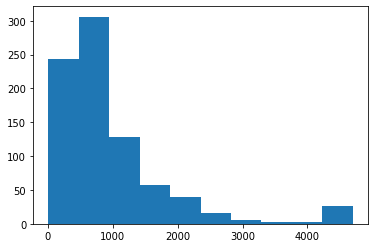

In [99]:
from matplotlib import pyplot as plt
plt.hist([len(d.split(" ")) for d in df["Quarterly_"]])
plt.show()

In [100]:
DOC_LEN = 3000
MAX_WORDS = 10000

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df1)
sequences = tokenizer.texts_to_sequences(df1)
word_index = tokenizer.word_index

In [101]:
print(len(tokenizer.word_index))

50944


In [102]:
df2 = keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen = DOC_LEN, dtype='int32', \
    padding='post', truncating='post', value=0.0)
df2

array([[2496,  135, 1532, ...,    0,    0,    0],
       [   7,  503,  295, ...,    0,    0,    0],
       [ 109,  162,  125, ...,    0,    0,    0],
       ...,
       [  60,   15,  483, ...,    0,    0,    0],
       [ 100,   27,  156, ...,    0,    0,    0],
       [ 284,  950,  174, ...,    0,    0,    0]], dtype=int32)

In [103]:
train_len = int(len(df2)*0.7)

In [104]:
x_train, y_train, x_test,  y_test = df2[0:train_len], df_random[0:train_len]["Class"], df2[train_len:], df_random[train_len:]["Class"]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(579, 3000) (249, 3000) (579,) (249,)


### Implement multi head self attention as a Keras layer







In [105]:

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output



### Implement a Transformer block as a layer

In [106]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


### Implement embedding layer
Two seperate embedding layers, one for tokens, one for token index (positions).

In [107]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [108]:
data_train = df_random.iloc[:int(df_random.shape[0] * 0.7), 8:-1]
data_test = df_random.iloc[int(df_random.shape[0] * 0.7):, 8:-1]
print(data_train.shape, data_test.shape)

(579, 31) (249, 31)


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
Fin_train = scaler.transform(data_train)
Fin_test = scaler.transform(data_test)
Fin_train

array([[ 0.61751292,  0.68040774,  0.23902638, ..., -0.85534353,
        -0.79223963, -0.79044855],
       [ 0.56772087,  0.52584541,  0.08376243, ..., -0.36299852,
        -0.79159462, -0.79044764],
       [ 0.56154897,  0.54372162,  0.06439444, ..., -0.74617749,
        -0.73744766, -0.83524385],
       ...,
       [ 0.53076968,  0.56029609,  0.03346214, ..., -0.55454709,
        -0.79040254, -0.79228731],
       [ 0.55385775,  0.58031469,  0.08643817, ..., -0.59389996,
        -0.78800149, -0.7946458 ],
       [ 0.51393305,  0.49495183,  0.02357811, ..., -0.53665516,
        -0.85224571, -0.70838685]])

In [110]:
Fin_model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(10, activation="relu", name="layer2"),
        
    ],name='Fin_model'
)


In [113]:

embed_dim = 100  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 100  # Hidden layer size in feed forward network inside transformer
vocab_size=len(tokenizer.word_index)+1
maxlen=3000
News_input = layers.Input(shape=(maxlen,), name="News")
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim) 
x = embedding_layer(News_input)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
News_features = layers.GlobalAveragePooling1D()(x)
#x = layers.Dropout(0.1)(x)
#x = layers.Dense(20, activation="relu")(x)
#x = layers.Dropout(0.1)(x)
Fin_input = keras.Input(shape=(31,), name="Financial ratio")
Fin_feature = Fin_model(Fin_input)

x = layers.concatenate([News_features, Fin_feature])
outputs = layers.Dense(3, activation="softmax", name="Class")(x) 

model = keras.Model(inputs=[News_input,Fin_input], outputs=outputs)



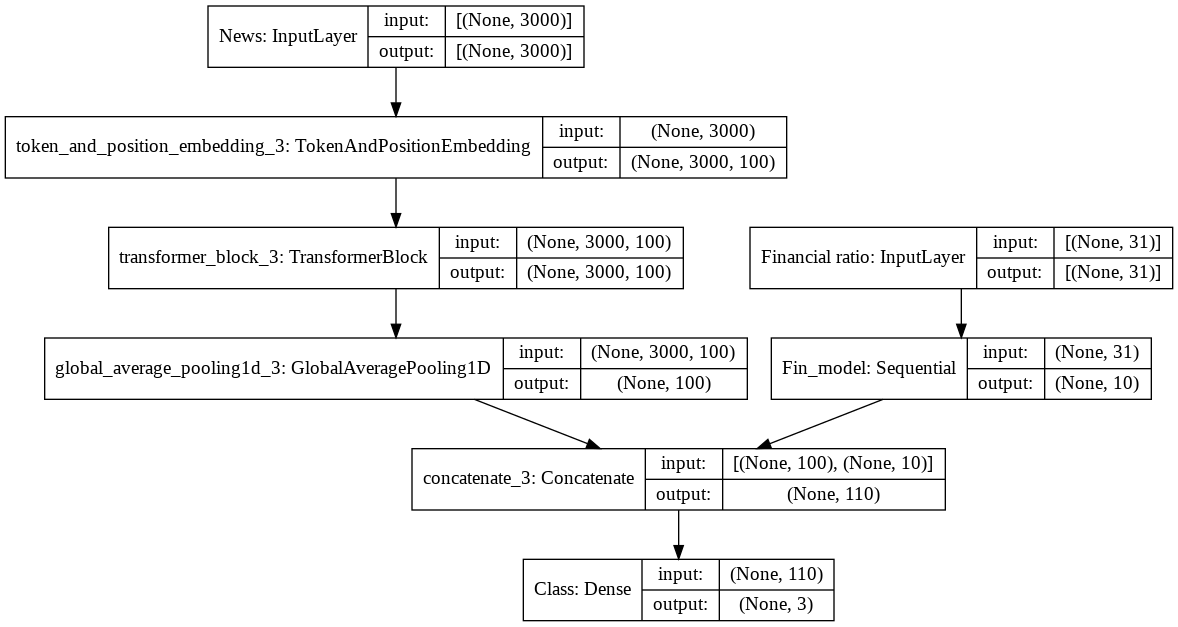

In [114]:
keras.utils.plot_model(model,"multi_input_and_output_model.png",show_shapes=True)

In [115]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
News (InputLayer)               [(None, 3000)]       0                                            
__________________________________________________________________________________________________
token_and_position_embedding_3  (None, 3000, 100)    5394500     News[0][0]                       
__________________________________________________________________________________________________
transformer_block_3 (Transforme (None, 3000, 100)    61000       token_and_position_embedding_3[0]
__________________________________________________________________________________________________
Financial ratio (InputLayer)    [(None, 31)]         0                                            
____________________________________________________________________________________________

In [116]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    {"News":x_train, "Financial ratio":Fin_train},
    {"Class":y_train},
     batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 9s 386ms/step - loss: 1.0762 - accuracy: 0.6439
Epoch 2/10
19/19 [==============================] - 7s 388ms/step - loss: 0.6444 - accuracy: 0.7663
Epoch 3/10
19/19 [==============================] - 7s 391ms/step - loss: 0.5873 - accuracy: 0.7829
Epoch 4/10
19/19 [==============================] - 7s 392ms/step - loss: 0.5575 - accuracy: 0.7785
Epoch 5/10
19/19 [==============================] - 7s 388ms/step - loss: 0.4361 - accuracy: 0.8123
Epoch 6/10
19/19 [==============================] - 7s 380ms/step - loss: 0.2969 - accuracy: 0.8813
Epoch 7/10
19/19 [==============================] - 7s 376ms/step - loss: 0.2304 - accuracy: 0.9246
Epoch 8/10
19/19 [==============================] - 7s 378ms/step - loss: 0.2811 - accuracy: 0.8776
Epoch 9/10
19/19 [==============================] - 7s 378ms/step - loss: 0.0946 - accuracy: 0.9665
Epoch 10/10
19/19 [==============================] - 7s 379ms/step - loss: 0.0474 - accuracy: 0.9810

In [117]:
results = model.evaluate(
    {"News":x_test, "Financial ratio":Fin_test},
    {"Class":y_test},)
print('test loss, test acc:', results)

8/8 [==============================] - 1s 130ms/step - loss: 0.6294 - accuracy: 0.8715
test loss, test acc: [0.6293633580207825, 0.8714859485626221]


In [118]:
Fin_input = keras.Input(shape=(31,), name="Financial ratio")
Fin_feature = Fin_model(Fin_input)


output = layers.Dense(3, activation="softmax", name="Class")(Fin_feature) 

model2 = keras.Model(inputs=Fin_input, outputs=output)

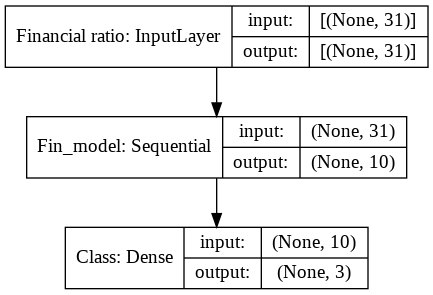

In [119]:
keras.utils.plot_model(model2,"multi_input_and_output_model.png",show_shapes=True)

In [120]:
model2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(
    {"Financial ratio":Fin_train},
    {"Class":y_train},
     batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.7867
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.7537
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7943
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7882
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7641
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8002
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8200
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8324
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8403
Epoch 10/10
19/19 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8644


In [121]:
results = model2.evaluate(
    {"Financial ratio":Fin_test},
    {"Class":y_test},)
print('test loss, test acc:', results)

8/8 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8353
test loss, test acc: [0.437635600566864, 0.8353413939476013]


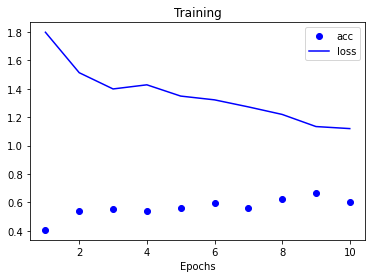

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='acc')
# b is for "solid blue line"
plt.plot(epochs, loss, 'b', label='loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.legend()

plt.show()